# Analysis Plan
1. Separate Women Led and Non-Women Led Countries
2. Cluster countries based on attributes in World Bank dataset (like GDP per Capita)
3. Compare COVID response in countries with similar GDP, based on whether they are women-led or not


## Intro to COVID Response Dataset
The dataset I am using is the Oxford COVID-19 Government Response Tracker (OxCGRT). This dataset "systematically collects information on several different common policy responses that governments have taken to respond to the pandemic on 18 indicators such as school closures and travel restrictions". It has data from more than 180 countries.

This codebook contains the definitions of each of the variables in the dataset: 
https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md

The primary indicators I'll be comparing are the health system policies, listed below. I will also be comparing the overall indexes in the dataset which combine individual factors. These indices are:  
- StringencyIndex
- GovernmentResponseIndex
- ContainmentHealthIndex: focusing on Containment and closure policies
- EconomicSupportIndex: focusing on Economic policies


### Health system policies

| ID | Name | Description | Measurement | Coding |
| --- | --- | --- | --- | --- |
| H1 | `H1_Public information campaigns` | Record presence of public info campaigns | Ordinal scale | 0 - no Covid-19 public information campaign <br/>1 - public officials urging caution about Covid-19 <br/>2- coordinated public information campaign (eg across traditional and social media) <br/>Blank - no data |
| | `H1_Flag` | | Binary flag for geographic scope |  0 - targeted <br/>1- general <br/>Blank - no data |
| H2 | `H2_Testing policy` | Record government policy on who has access to testing <br/><br/>Note: this records policies about testing for current infection (PCR tests) not testing for immunity (antibody test) | Ordinal scale | 0 - no testing policy <br/>1 - only those who both (a) have symptoms AND (b) meet specific criteria (eg key workers, admitted to hospital, came into contact with a known case, returned from overseas) <br/>2 - testing of anyone showing Covid-19 symptoms <br/>3 - open public testing (eg "drive through" testing available to asymptomatic people) <br/>Blank - no data |
| H3 | `H3_Contact tracing` | Record government policy on contact tracing after a positive diagnosis <br/><br/>Note: we are looking for policies that would identify all people potentially exposed to Covid-19; voluntary bluetooth apps are unlikely to achieve this | Ordinal scale | 0 - no contact tracing <br/>1 - limited contact tracing; not done for all cases <br/>2 - comprehensive contact tracing; done for all identified cases |
| H4 | `H4_Emergency investment in healthcare` | Announced short term spending on healthcare system, eg hospitals, masks, etc <br/><br/>Note: only record amount additional to previously announced spending | USD | Record monetary value in USD <br/>0 - no new spending that day <br/>Blank - no data |
| H5 | `H5_Investment in vaccines` | Announced public spending on Covid-19 vaccine development <br/><br/>Note: only record amount additional to previously announced spending | USD | Record monetary value in USD <br/>0 - no new spending that day <br/>Blank - no data |
| H6 | `H6_Facial Coverings` | Record policies on the use of facial coverings outside the home <br/> | Ordinal scale | 0 - No policy <br/>1 - Recommended <br/>2 - Required in some specified shared/public spaces outside the home with other people present, or some situations when social distancing not possible <br/>3 - Required in all shared/public spaces outside the home with other people present or all situations when social distancing not possible <br/>4 - Required outside the home at all times regardless of location or presence of other people |

In [22]:
import pandas as pd
covid_response_df = pd.read_csv("OxCGRT_latest.csv")

# This codebook contains the definitions of each of the variables in the dataset: 
# https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/codebook.md
covid_response_df

/Users/mac/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CountryName,CountryCode,RegionName,RegionCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
1,Aruba,ABW,NaN,NaN,20200102,0.0,NaN,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
2,Aruba,ABW,NaN,NaN,20200103,0.0,NaN,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
3,Aruba,ABW,NaN,NaN,20200104,0.0,NaN,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
4,Aruba,ABW,NaN,NaN,20200105,0.0,NaN,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
5,Aruba,ABW,NaN,NaN,20200106,0.0,NaN,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
6,Aruba,ABW,NaN,NaN,20200107,0.0,NaN,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
7,Aruba,ABW,NaN,NaN,20200108,0.0,NaN,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
8,Aruba,ABW,NaN,NaN,20200109,0.0,NaN,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0
9,Aruba,ABW,NaN,NaN,20200110,0.0,NaN,0.0,NaN,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0


In [5]:
# Listing the columns
list(df.columns)

['CountryName',
 'CountryCode',
 'RegionName',
 'RegionCode',
 'Date',
 'C1_School closing',
 'C1_Flag',
 'C2_Workplace closing',
 'C2_Flag',
 'C3_Cancel public events',
 'C3_Flag',
 'C4_Restrictions on gatherings',
 'C4_Flag',
 'C5_Close public transport',
 'C5_Flag',
 'C6_Stay at home requirements',
 'C6_Flag',
 'C7_Restrictions on internal movement',
 'C7_Flag',
 'C8_International travel controls',
 'E1_Income support',
 'E1_Flag',
 'E2_Debt/contract relief',
 'E3_Fiscal measures',
 'E4_International support',
 'H1_Public information campaigns',
 'H1_Flag',
 'H2_Testing policy',
 'H3_Contact tracing',
 'H4_Emergency investment in healthcare',
 'H5_Investment in vaccines',
 'H6_Facial Coverings',
 'H6_Flag',
 'M1_Wildcard',
 'ConfirmedCases',
 'ConfirmedDeaths',
 'StringencyIndex',
 'StringencyIndexForDisplay',
 'StringencyLegacyIndex',
 'StringencyLegacyIndexForDisplay',
 'GovernmentResponseIndex',
 'GovernmentResponseIndexForDisplay',
 'ContainmentHealthIndex',
 'ContainmentHealthI

The list of women led countries is from the Women's Power Index website shown below: https://www.cfr.org/article/womens-power-index This list includes all countries where there is currently a female head of state or government as of September 28, 2020.

## Grabbing the women-led countries

In [39]:
# Creating separate DF of women-led countries
list_of_women_led_countries = ["Bolivia","Bangladesh","Barbados","Belgium","Denmark","Estonia","Ethiopia","Finland","Gabon","Georgia","Germany","Greece","Iceland","Nepal","New Zealand","Norway","Serbia","Singapore","Slovakia","Switzerland","Togo","Trinidad and Tobago"]
women_led_countries_df = covid_response_df[covid_response_df['CountryName'].isin(list_of_women_led_countries)]
print("# of women-led countries")
print(women_led_countries_df['CountryName'].nunique())

non_women_led_countries_df = covid_response_df[~covid_response_df['CountryName'].isin(list_of_women_led_countries)]
print("# of non-women-led countries")
print(non_women_led_countries_df['CountryName'].nunique())

# of women-led countries
21
# of non-women-led countries
166


In [24]:
# Analyzing some sample data
grouped_df = women_led_countries_df.groupby("CountryName")
maximum_values_over_time = grouped_df.max()
maximum_values_over_time['ContainmentHealthIndex']

CountryName
Bangladesh             88.19
Barbados               84.72
Belgium                75.00
Bolivia                81.25
Denmark                65.97
Estonia                63.89
Ethiopia               73.61
Finland                57.64
Gabon                  78.47
Georgia                93.06
Germany                74.31
Greece                 70.83
Iceland                56.94
Nepal                  89.24
New Zealand            86.11
Norway                 66.67
Serbia                 86.11
Singapore              86.11
Switzerland            65.28
Togo                   72.22
Trinidad and Tobago    84.03
Name: ContainmentHealthIndex, dtype: float64

## World Bank Data
Now that we have the data on a government's COVID response, we want to compare counties that are similar in terms of GDP and country attributes. To get this, we can load up data fromm the World Bank on World_Development_Indicators for each country. We will use the data for 2019 since 2020 is not yet over. The data can be found at https://databank.worldbank.org/source/world-development-indicators

In [16]:
# df3 = pd.read_csv("country_data.csv")
# df3
world_bank_df = pd.read_excel("Data_Extract_From_World_Development_Indicators.xlsx")
world_bank_df

,Country Name,Country Code,Series Name,Series Code,2019 [YR2019],2020 [YR2020]
0,Afghanistan,AFG,Domestic general government health expenditure...,SH.XPD.GHED.CH.ZS,..,..
1,Afghanistan,AFG,Domestic general government health expenditure...,SH.XPD.GHED.GD.ZS,..,..
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,1.91014e+10,..
3,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,502.115,..
4,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,2.90123,..
5,Afghanistan,AFG,Gini index (World Bank estimate),SI.POV.GINI,..,..
6,Afghanistan,AFG,Human capital index (HCI) (scale 0-1),HD.HCI.OVRL,..,0.400284
7,Afghanistan,AFG,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,..,..
8,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,..,..
9,Afghanistan,AFG,"Population ages 65 and above, total",SP.POP.65UP.TO,995094,..


In [20]:
# Exploring the data in the World Bank dataset
world_bank_df['Series Name'].unique()

array(['Domestic general government health expenditure (% of current health expenditure)',
       'Domestic general government health expenditure (% of GDP)',
       'GDP (current US$)', 'GDP per capita (current US$)',
       'GDP growth (annual %)', 'Gini index (World Bank estimate)',
       'Human capital index (HCI) (scale 0-1)',
       'Literacy rate, adult total (% of people ages 15 and above)',
       'Life expectancy at birth, total (years)',
       'Population ages 65 and above, total',
       'Population growth (annual %)',
       'Population density (people per sq. km of land area)',
       'Population, total',
       'Population in urban agglomerations of more than 1 million',
       'Population in urban agglomerations of more than 1 million (% of total population)',
       nan], dtype=object)

# Now, we have to join the datasets together

In [41]:
women_led_joined_df = women_led_countries_df.merge(world_bank_df, how = 'inner', left_on='CountryCode',right_on='Country Code')
complete_joined_df = covid_response_df.merge(world_bank_df, how = 'inner', left_on='CountryCode',right_on='Country Code')
non_women_led_joined_df = non_women_led_countries_df.merge(world_bank_df, how = 'inner', left_on='CountryCode',right_on='Country Code')
women_led_joined_df

,CountryName,CountryCode,RegionName,RegionCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,...,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay,Country Name,Country Code,Series Name,Series Code,2019 [YR2019],2020 [YR2020]
0,Belgium,BEL,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,Belgium,BEL,Domestic general government health expenditure...,SH.XPD.GHED.CH.ZS,..,..
1,Belgium,BEL,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,Belgium,BEL,Domestic general government health expenditure...,SH.XPD.GHED.GD.ZS,..,..
2,Belgium,BEL,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,Belgium,BEL,GDP (current US$),NY.GDP.MKTP.CD,5.29607e+11,..
3,Belgium,BEL,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,Belgium,BEL,GDP per capita (current US$),NY.GDP.PCAP.CD,46116.7,..
4,Belgium,BEL,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,Belgium,BEL,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,1.40446,..
5,Belgium,BEL,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,Belgium,BEL,Gini index (World Bank estimate),SI.POV.GINI,..,..
6,Belgium,BEL,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,Belgium,BEL,Human capital index (HCI) (scale 0-1),HD.HCI.OVRL,..,0.76042
7,Belgium,BEL,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,Belgium,BEL,"Literacy rate, adult total (% of people ages 1...",SE.ADT.LITR.ZS,..,..
8,Belgium,BEL,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,Belgium,BEL,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,..,..
9,Belgium,BEL,NaN,NaN,20200101,0.0,NaN,0.0,NaN,0.0,...,0.0,0.00,0.0,0.0,Belgium,BEL,"Population ages 65 and above, total",SP.POP.65UP.TO,2182725,..


In [101]:
# Adding a GDP column
def add_GDP_column(row):
    if row['Series Name'] == 'GDP per capita (current US$)' and row['2019 [YR2019]'] != '..':
        return float(row['2019 [YR2019]'])
    else: 
        return 0
def add_HCI_column(row): 
    if row['Series Name'] == 'Human capital index (HCI) (scale 0-1)' and row['2020 [YR2020]'] != '..':
        return float(row['2020 [YR2020]'])
    else: 
        return 0    
women_led_joined_df['GDP_Per_Capita']  = women_led_joined_df.apply (lambda row: add_GDP_column(row), axis=1)
non_women_led_joined_df['GDP_Per_Capita'] = non_women_led_joined_df.apply (lambda row: add_GDP_column(row), axis=1)
women_led_joined_df['HCI']  = women_led_joined_df.apply (lambda row: add_HCI_column(row), axis=1)
non_women_led_joined_df['HCI'] = non_women_led_joined_df.apply (lambda row: add_HCI_column(row), axis=1)

In [102]:
max(non_women_led_joined_df['HCI'])
# non_women_led_joined_df

0.812756538391113

## Now that we have combined data, we can bucket countries based on their GDP

In [103]:
# We are pulling max values over time for comparison
grouped_df_women = women_led_joined_df.groupby("CountryName")
women_maximum_values_over_time = grouped_df_women.max()

grouped_df_non_women = non_women_led_joined_df.groupby("CountryName")
non_women_maximum_values_over_time = grouped_df_non_women.max()

# non_women_maximum_values_over_time
# women_maximum_values_over_time
# Make 5 equal buckets for GDP per Capita values in USD
women_maximum_values_over_time['GDP_bucket'] = pd.qcut(women_maximum_values_over_time['GDP_Per_Capita'], q=5)
non_women_maximum_values_over_time['GDP_bucket'] = pd.qcut(non_women_maximum_values_over_time['GDP_Per_Capita'], q=5)

# Make 5 equal buckets for Human Capital Index, from 0 to 1
women_maximum_values_over_time['HCI_bucket'] = pd.qcut(women_maximum_values_over_time['GDP_Per_Capita'], q=5)
non_women_maximum_values_over_time['HCI_bucket'] = pd.qcut(non_women_maximum_values_over_time['GDP_Per_Capita'], q=5)



# Group by bucket, compare mean values 
gdp_bucket_women_led = women_maximum_values_over_time.groupby(by = 'GDP_bucket')['ContainmentHealthIndex', 'EconomicSupportIndex', 'GovernmentResponseIndex', 'StringencyIndex', 'H1_Flag','H2_Testing policy','H3_Contact tracing','H4_Emergency investment in healthcare','H5_Investment in vaccines','H6_Facial Coverings'].mean().reset_index(drop = False)
gdp_bucket_non_women_led = non_women_maximum_values_over_time.groupby(by = 'GDP_bucket')['ContainmentHealthIndex', 'EconomicSupportIndex', 'GovernmentResponseIndex', 'StringencyIndex', 'H1_Flag','H2_Testing policy','H3_Contact tracing','H4_Emergency investment in healthcare','H5_Investment in vaccines','H6_Facial Coverings'].mean().reset_index(drop = False)

hci_bucket_women_led = women_maximum_values_over_time.groupby(by = 'HCI_bucket')['ContainmentHealthIndex', 'EconomicSupportIndex', 'GovernmentResponseIndex', 'StringencyIndex', 'H1_Flag','H2_Testing policy','H3_Contact tracing','H4_Emergency investment in healthcare','H5_Investment in vaccines','H6_Facial Coverings'].mean().reset_index(drop = False)
hci_bucket_non_women_led = non_women_maximum_values_over_time.groupby(by = 'HCI_bucket')['ContainmentHealthIndex', 'EconomicSupportIndex', 'GovernmentResponseIndex', 'StringencyIndex', 'H1_Flag','H2_Testing policy','H3_Contact tracing','H4_Emergency investment in healthcare','H5_Investment in vaccines','H6_Facial Coverings'].mean().reset_index(drop = False)


gdp_bucket_women_led

,GDP_bucket,ContainmentHealthIndex,EconomicSupportIndex,GovernmentResponseIndex,StringencyIndex,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings
0,"(675.541, 3552.069]",80.9020,65.000,76.4900,87.9660,1.0,1.40,1.40,7.134659e+07,0.000000e+00,3.4
1,"(3552.069, 17276.465]",85.4175,65.625,81.6975,93.0550,1.0,2.50,2.00,7.272269e+07,0.000000e+00,3.0
2,"(17276.465, 42084.353]",76.3875,81.250,74.5550,86.8075,1.0,2.25,1.75,7.505877e+07,6.778126e+06,2.5
3,"(42084.353, 59822.093]",68.2300,78.125,68.7525,74.5350,1.0,2.50,1.75,1.607041e+10,2.098860e+08,2.0
4,"(59822.093, 81993.727]",68.7500,87.500,70.8325,72.9175,1.0,2.50,2.00,4.816789e+08,1.298430e+08,2.5


In [104]:
hci_bucket_non_women_led

,HCI_bucket,ContainmentHealthIndex,EconomicSupportIndex,GovernmentResponseIndex,StringencyIndex,H1_Flag,H2_Testing policy,H3_Contact tracing,H4_Emergency investment in healthcare,H5_Investment in vaccines,H6_Facial Coverings
0,"(-0.001, 692.011]",72.244839,37.931034,65.555667,79.868710,1.0,2.096774,1.451613,2.411393e+07,0.000000e+00,2.678571
1,"(692.011, 2435.404]",74.406129,50.806452,68.951935,80.466129,1.0,1.774194,1.580645,3.020362e+08,4.259897e+05,3.062500
2,"(2435.404, 6117.489]",83.453125,59.765625,78.822188,91.334062,1.0,2.093750,1.687500,1.491785e+08,1.275518e+07,3.062500
3,"(6117.489, 17488.65]",79.708750,65.234375,76.581562,84.925000,1.0,2.187500,1.781250,1.883029e+09,1.796869e+08,3.062500
4,"(17488.65, 114704.594]",75.651250,78.515625,75.762500,80.005625,1.0,2.562500,1.968750,9.142498e+09,4.138593e+08,2.906250


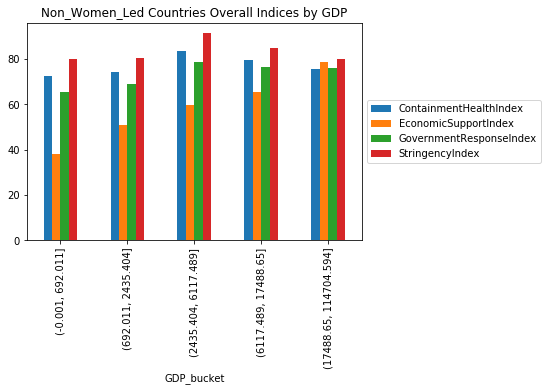

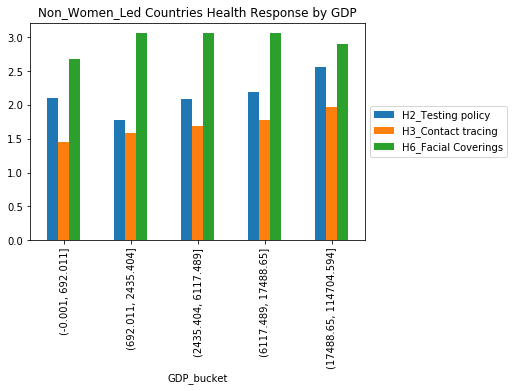

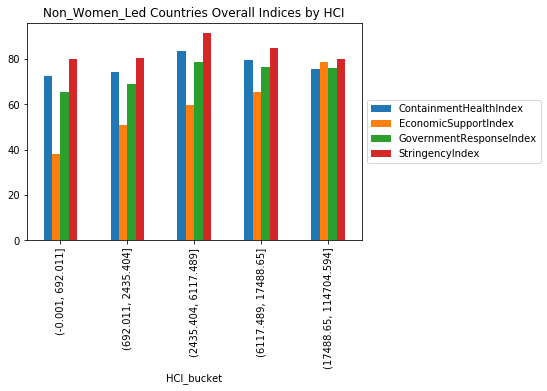

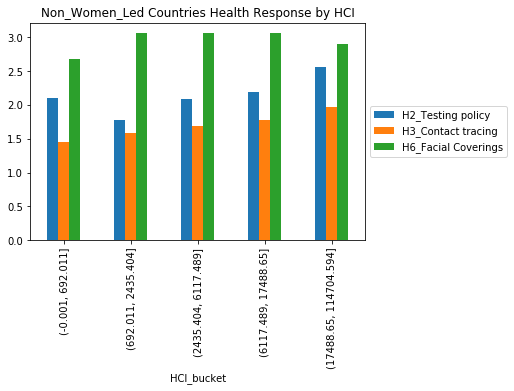

In [106]:
plt = gdp_bucket_non_women_led.plot(title = 'Non_Women_Led Countries Overall Indices by GDP', x="GDP_bucket", y=["ContainmentHealthIndex", "EconomicSupportIndex", "GovernmentResponseIndex", "StringencyIndex"], kind="bar")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.show()

plt3_non_women = gdp_bucket_non_women_led.plot(title = 'Non_Women_Led Countries Health Response by GDP', x="GDP_bucket", y=['H2_Testing policy','H3_Contact tracing','H6_Facial Coverings'], kind="bar")
plt3_non_women.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt_hci = hci_bucket_non_women_led.plot(title = 'Non_Women_Led Countries Overall Indices by HCI', x="HCI_bucket", y=["ContainmentHealthIndex", "EconomicSupportIndex", "GovernmentResponseIndex", "StringencyIndex"], kind="bar")
plt_hci.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.show()

plt3_non_women_hci = hci_bucket_non_women_led.plot(title = 'Non_Women_Led Countries Health Response by HCI', x="HCI_bucket", y=['H2_Testing policy','H3_Contact tracing','H6_Facial Coverings'], kind="bar")
plt3_non_women_hci.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


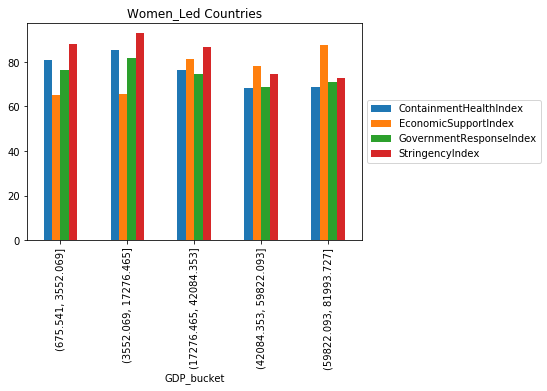

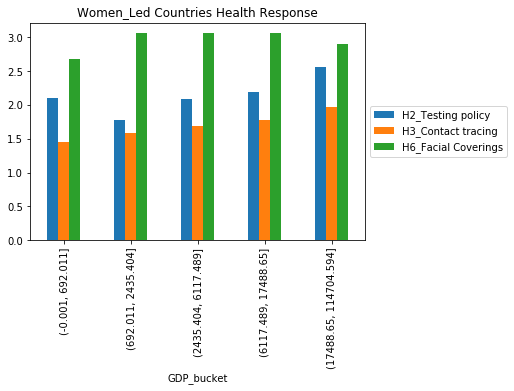

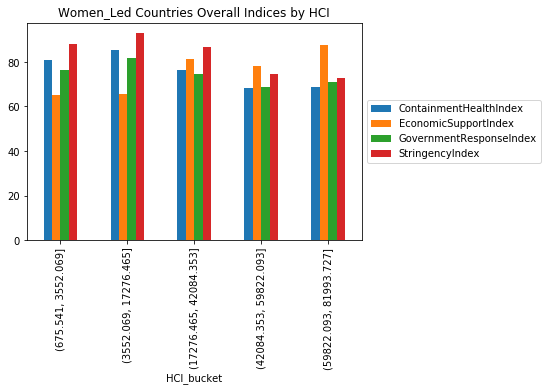

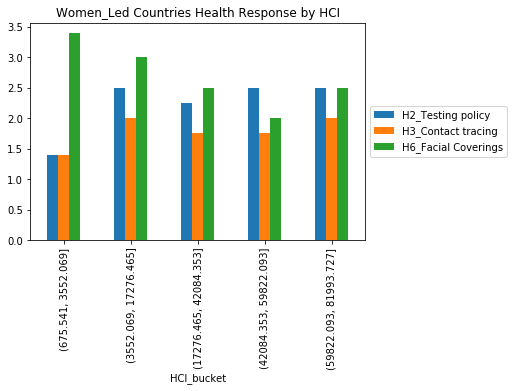

In [108]:
plt2 = gdp_bucket_women_led.plot(title = 'Women_Led Countries', x="GDP_bucket", y=["ContainmentHealthIndex", "EconomicSupportIndex", "GovernmentResponseIndex", "StringencyIndex"], kind="bar")
plt2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt3_women = gdp_bucket_non_women_led.plot(title = 'Women_Led Countries Health Response', x="GDP_bucket", y=['H2_Testing policy','H3_Contact tracing','H6_Facial Coverings'], kind="bar")
plt3_women.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


plt_hci_2 = hci_bucket_women_led.plot(title = 'Women_Led Countries Overall Indices by HCI', x="HCI_bucket", y=["ContainmentHealthIndex", "EconomicSupportIndex", "GovernmentResponseIndex", "StringencyIndex"], kind="bar")
plt_hci_2.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.show()

plt3_women_hci = hci_bucket_women_led.plot(title = 'Women_Led Countries Health Response by HCI', x="HCI_bucket", y=['H2_Testing policy','H3_Contact tracing','H6_Facial Coverings'], kind="bar")
plt3_women_hci.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## Analysis
Some trends I've noticed so far:
- There is a significantly higher EconomicSupportIndex in the women_led countries across all GDP clusters
- Across both populations, as GDP per capita increases, EconomicSupportIndex tends to increase as well
- For women led countries, Containment Health Index tends to go down as GDP increases

For future analysis, I will try to use the same GDP bucketing for both women and non_women countries

In [83]:
gdp_bucket_non_women_led

,GDP_bucket,ContainmentHealthIndex,EconomicSupportIndex,GovernmentResponseIndex,StringencyIndex
0,"(-0.001, 692.011]",72.244839,37.931034,65.555667,79.868710
1,"(692.011, 2435.404]",74.406129,50.806452,68.951935,80.466129
2,"(2435.404, 6117.489]",83.453125,59.765625,78.822188,91.334062
3,"(6117.489, 17488.65]",79.708750,65.234375,76.581562,84.925000
4,"(17488.65, 114704.594]",75.651250,78.515625,75.762500,80.005625


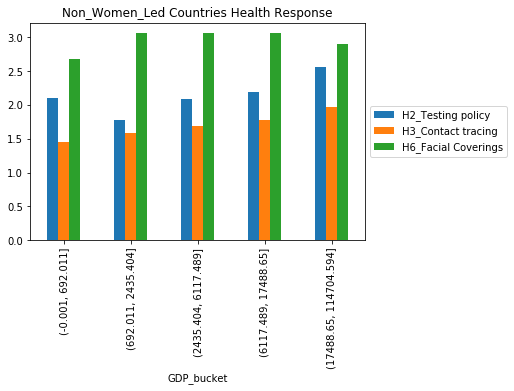